# Basic
# Import the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import the Dataset

In [3]:
df = pd.read_excel("homeprices.xlsx")

# Data Analysis

In [4]:
df.head()

,area,price
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [5]:
df.tail()

,area,price
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [7]:
df.head(11)

,area,price
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [10]:
df[10:16]

,area,price
10,2150,34500
11,2100,32000
12,2100,34500
13,2510,40050
14,2250,34100
15,3100,51500


In [12]:
df['price'].head(8)

0    31500
1    35000
2    41050
3    36100
4    52100
5    32500
6    20000
7    24500
Name: price, dtype: int64

In [13]:
df.area[30:35]

30    2100
31    2100
32    2500
33    2250
34    3000
Name: area, dtype: int64

In [14]:
df.mean()

area      2289.000000
price    37269.166667
dtype: float64

In [15]:
df.area.mean()

2289.0

In [16]:
df.describe()

,area,price
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [22]:
df.shape

(60, 2)

In [25]:
df.tail(10).isnull()

,area,price
50,False,False
51,False,False
52,False,False
53,False,False
54,False,False
55,False,False
56,False,False
57,False,False
58,False,False
59,False,False


# Visualization

Text(0.5, 1.0, 'Home Price Plot')

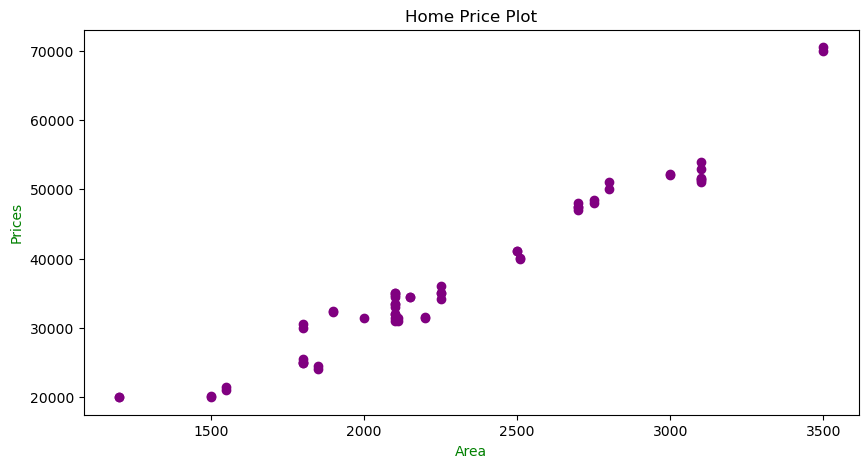

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(df.area, df.price, marker="o", color = "purple" )
plt.xlabel("Area", color="green")
plt.ylabel("Prices", color="green")
plt.title("Home Price Plot", color="black")

# Notebook - 2 Generalization

In [84]:
from sklearn.model_selection import train_test_split as tts
x = df[['area']]
y = df['price']
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=50) #dividing the data

In [85]:
xtrain.head()

,area
24,2800
58,2200
12,2100
34,3000
23,1200


In [86]:
ytrain.head()

24    50000
58    31560
12    34500
34    52200
23    20000
Name: price, dtype: int64

# Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [88]:
reg.fit(xtrain,ytrain) #training the model

LinearRegression()

In [89]:
m = reg.coef_ #y= mx + c 
m

array([21.57004])

In [90]:
c = reg.intercept_
c

-11970.14887379227

In [91]:
y = m*5000 + c #manual
y

array([95880.05112098])

In [92]:
reg.predict([[2100]]) #using model

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33326.93512401])

In [93]:
pred = reg.predict(xtest) #testing the model using test data
pred

array([33326.93512401, 21463.41312459, 21463.41312459, 54896.97512297,
       54896.97512297, 46268.95912338, 26855.92312433, 42170.65152358,
       42170.65152358, 36562.44112385, 26855.92312433, 33326.93512401,
       33326.93512401, 26855.92312433, 33326.93512401, 46268.95912338,
       34405.43712396, 54896.97512297])

In [94]:
df["Predicted Result"] = reg.predict(x) 
df.head(10)


,area,price,Predicted Result
0,2000,31500,31169.931124
1,2100,35000,33326.935124
2,2500,41050,41954.951124
3,2250,36100,36562.441124
4,3000,52100,52739.971123
5,1900,32500,29012.927124
6,1500,20000,20384.911125
7,1850,24500,27934.425124
8,2700,48000,46268.959123
9,2100,31000,33326.935124


# Find error of model

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(ytest,pred)
mse

3295858.6648702496

In [96]:
mae = mean_absolute_error(ytest,pred)
mae

1535.402071862007

# Best Fit Line

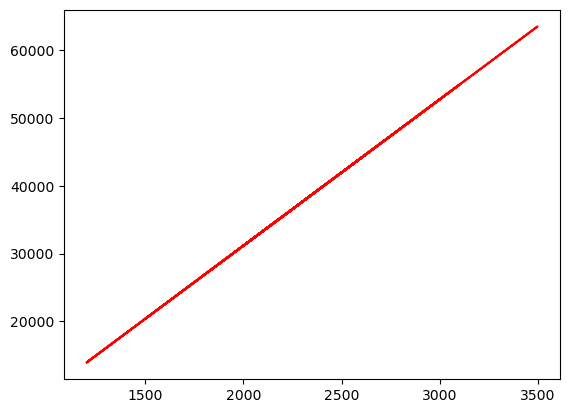

In [97]:
plt.plot(xtrain,reg.predict(xtrain),color="red")

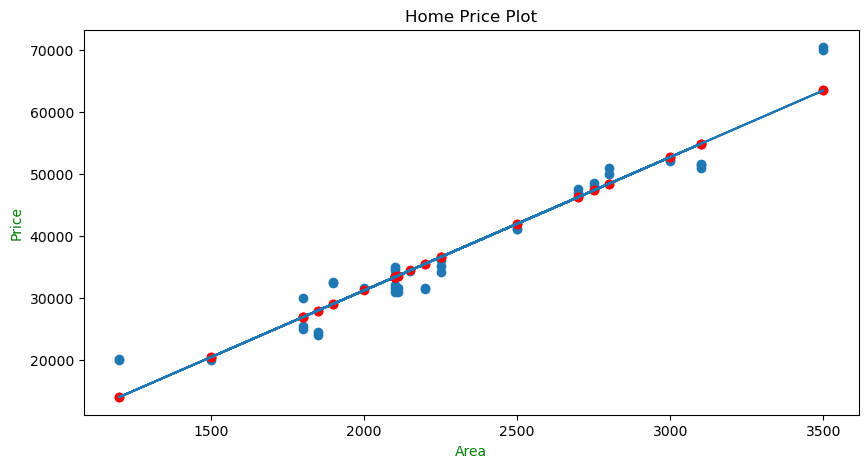

In [98]:
plt.figure(figsize=(10,5))
plt.xlabel("Area", color = "green")
plt.ylabel("Price", color = "green")
plt.title("Home Price Plot",color = "black")
plt.scatter(xtrain,ytrain)#all dat points
plt.plot(xtrain,reg.predict(xtrain)) 
plt.scatter(xtrain,reg.predict(xtrain),color="red") #bestfit line

# Accuracy Checking

In [99]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.9685296123368736

# Create new dataset

In [100]:
xtest.to_csv("xtest.csv")

In [101]:
xtest.head()

,area
1,2100
17,1550
47,1550
29,3100
25,3100


In [102]:
len(xtest)

18

# Save Model

In [103]:
import pickle as pk #1st method
import joblib as jb #2nd method

In [106]:
pk.dump(reg,open("My Regression Model 1","wb")) # wb = write

In [111]:
reg2 = pk.load(open("My Regression Model 1","rb")) # rb = read

In [115]:
#By importing the warnings module and using the filterwarnings("ignore") function with the argument "ignore", you are instructing Python to ignore and not display any warning messages that might occur during the execution of your code.
import warnings
warnings.filterwarnings("ignore")

In [116]:
reg2.predict([[2000]])

array([31169.93112412])

In [117]:
jb.dump(reg, "My Regression Model 2")

['My Regression Model 2']